# **Uploading Data**

In [ ]:
# Import libraries
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# the code below allows you to access your Google Drive. It'll
# ask you to login and verity that you want to use it
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# root_dir is the path to My_Drive folder.
root_dir = "/content/drive/My Drive/"

#accessing data folder
data_folder = root_dir + "Colab Notebooks/MPP Science Replication Package/Data/csv"

# change directory to the data folder
os.chdir(data_folder)

In [ ]:
#accessing the clean data that from Final Check Point models  I'll be working with in the folder
survey_df = pd.read_csv('model_survey_df.csv')
#print first 5 ust to look at data
survey_df.head()

,id,resp_male,resp_age,resp_black,resp_highedu,el_flushot,auth_doc,video_race,concordant,video_long,watch_video,rating_trust,rating_qualified
0,18197,1,39.0,1,1,Unknown,1,0,0,1,1,6,6
1,5465,1,46.0,1,1,Unknown,1,0,0,0,1,5,6
2,7534,1,31.0,1,1,Unknown,1,0,0,0,1,6,5
3,5456,1,47.0,1,1,Unknown,0,1,1,0,1,5,5
4,4758,1,39.0,1,1,Unknown,1,0,0,1,1,5,5


# **Creating Seperate DF's and Standardize Data**


---
I am creating separate dataframes for `'all'` respondents (regardless of `'el_flushot'` response), `'known'` flushot status, and `'unknown'` flushot status groups. With feedback from the Models assignment, I plant to ran k-means clustering on each dataframe to examine the patterns within these groups. After clustering, I will check to see how the resulting clusters corresponded to flu-shot status across all respondents.

This approach will hopefully allows me to compare the characteristics of the 'unknown' group with the 'known' flu-shot groups. By analyzing clusters across all three datasets, I can gain a comprehensive understanding of whether the unknown respondents resemble one of the known groups or show a mixture of traits, and how these clusters relate to demographics and other variables (rating_trust/rating_qualified)

In [ ]:
# create seperate dataframes for bool and 'unknown' values
resp_known = survey_df[survey_df['el_flushot'].isin(['0', '1'])].copy()
resp_unknown = survey_df[survey_df['el_flushot'] == 'Unknown']

In [ ]:
# Select relevant columns for clustering
# include demographics that might influence responses
  #male and watch video not needed
features_for_clustering = ['resp_age', 'resp_black', 'resp_highedu','auth_doc','video_race', 'concordant', 'video_long','rating_trust','rating_qualified']

#seperate 3 categories
X_all = survey_df[features_for_clustering]
X_known = resp_known[features_for_clustering]
X_unknown = resp_unknown[features_for_clustering]

In [ ]:
# import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler
# set scaler to StandardScaler() object
scaler = StandardScaler()

#use .fit_transform() on the scaler with the numeric data as its argument
scaled_data_all = scaler.fit_transform(X_all)

# scaled_data is a numpy array. We want a dataframe...use pd.DataFrame
# you should also set scaled_data's columns to be the same as features_for_clustering
scaled_data_all = pd.DataFrame(scaled_data_all, columns=features_for_clustering, index=X_all.index)

# let's see the transformation
print('All')
display(scaled_data_all.head())

#REPEAT FOR KNOWN AND UNKNOWN
# KNOWN
scaled_data_known = scaler.fit_transform(X_known)
scaled_data_known = pd.DataFrame(scaled_data_known, columns=features_for_clustering, index=X_known.index)
print('Known')
display(scaled_data_known.head())

# UNKNOWN
scaled_data_unknown = scaler.fit_transform(X_unknown)
scaled_data_unknown = pd.DataFrame(scaled_data_unknown, columns=features_for_clustering, index=X_unknown.index)
print('Unknown')
display(scaled_data_unknown.head())

All


,resp_age,resp_black,resp_highedu,auth_doc,video_race,concordant,video_long,rating_trust,rating_qualified
0,0.322479,0.854554,0.363716,0.417832,-1.003810,-1.008679,2.460914,0.563263,0.525138
1,1.360883,0.854554,0.363716,0.417832,-1.003810,-1.008679,-0.406353,-0.095928,0.525138
2,-0.864268,0.854554,0.363716,0.417832,-1.003810,-1.008679,-0.406353,0.563263,-0.152482
3,1.509226,0.854554,0.363716,-2.393305,0.996205,0.991395,-0.406353,-0.095928,-0.152482
4,0.322479,0.854554,0.363716,0.417832,-1.003810,-1.008679,2.460914,-0.095928,-0.152482


Known


,resp_age,resp_black,resp_highedu,auth_doc,video_race,concordant,video_long,rating_trust,rating_qualified
8,-1.246997,-0.874028,0.342997,0.367168,0.965991,-1.007547,-0.342997,0.492674,0.464814
12,-1.842618,1.144128,0.342997,0.367168,-1.035206,-1.007547,2.915476,-2.884937,-0.260776
13,0.539865,-0.874028,0.342997,0.367168,-1.035206,0.992509,-0.342997,0.492674,0.464814
14,-0.055755,-0.874028,0.342997,0.367168,-1.035206,0.992509,-0.342997,1.168196,1.190404
15,-0.651376,-0.874028,0.342997,0.367168,-1.035206,0.992509,-0.342997,-0.182848,-0.986366


Unknown


,resp_age,resp_black,resp_highedu,auth_doc,video_race,concordant,video_long,rating_trust,rating_qualified
0,0.394640,0.780914,0.369777,0.432436,-0.994628,-1.009017,2.356468,0.584501,0.542910
1,1.442623,0.780914,0.369777,0.432436,-0.994628,-1.009017,-0.424364,-0.070893,0.542910
2,-0.803055,0.780914,0.369777,0.432436,-0.994628,-1.009017,-0.424364,0.584501,-0.123171
3,1.592334,0.780914,0.369777,-2.312483,1.005401,0.991063,-0.424364,-0.070893,-0.123171
4,0.394640,0.780914,0.369777,0.432436,-0.994628,-1.009017,2.356468,-0.070893,-0.123171


# **FOR ALL**

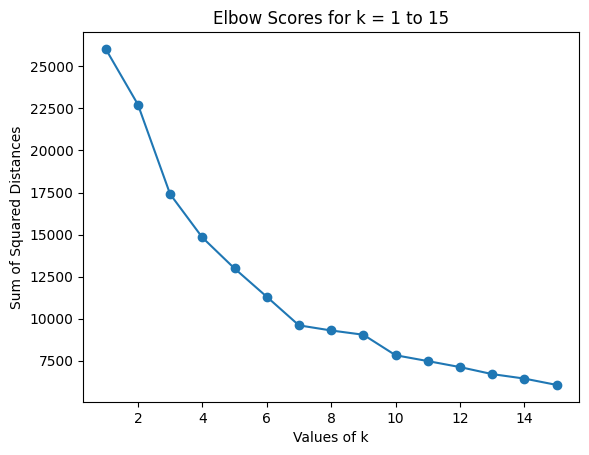

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

SEED = 4999
elbow_scores = []

# loop for k=1 to k=15
for k in range(1, 16):
    untrained_kmeans = KMeans(n_clusters=k, random_state=SEED)
    trained_kmeans = untrained_kmeans.fit(scaled_data_all)
    elbow_scores.append(trained_kmeans.inertia_)

plt.plot(range(1, 16), elbow_scores, marker='o')
plt.xlabel("Values of k")
plt.ylabel("Sum of Squared Distances")
plt.title(f"Elbow Scores for k = 1 to {len(elbow_scores)}")
plt.show()

I re-ran the elbow method with the corrected scaling (as I used `Normalizer()` last time). The main elbow is still at k=3

In [ ]:
# create an untrained KMeans model with k=3 and random_state=SEED
k_means = KMeans(
    n_clusters=3,
    init='random',
    n_init=10,
    max_iter=100,
    random_state=SEED
)

# fit the model on the FULL SCALED DATA
trained_model = k_means.fit(scaled_data_all)

# predict cluster labels for everyone
all_clusters = trained_model.predict(scaled_data_all)

# add to your full dataframe
survey_df["cluster"] = all_clusters

In [ ]:
survey_df['cluster'].value_counts()

,count
cluster,
1,1221
0,845
2,827


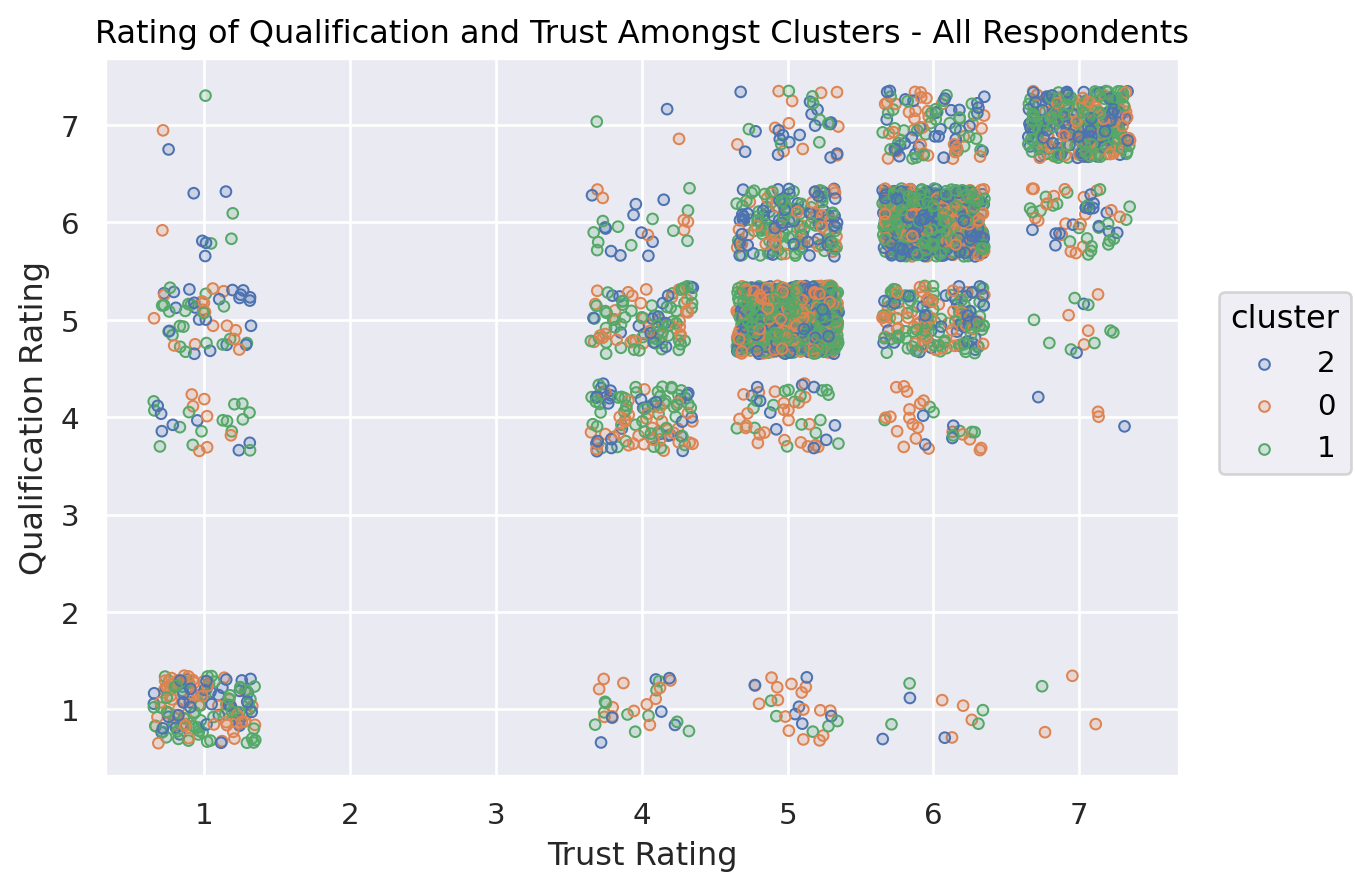

In [ ]:
import seaborn.objects as so

cluster_colors = {0: "0", 1: "1", 2: "2"}
all_jitter = (
    so.Plot(
        survey_df["rating_trust"],
        survey_df["rating_qualified"],
        color=survey_df["cluster"].map(cluster_colors),  # cluster color
    )
    .add(so.Dots(), so.Jitter(x=0.7, y=0.7))
    .label(
        x="Trust Rating",
        y="Qualification Rating",
        title="Rating of Qualification and Trust Amongst Clusters - All Respondents"
    )
)
all_jitter

# **FOR KNOWN**

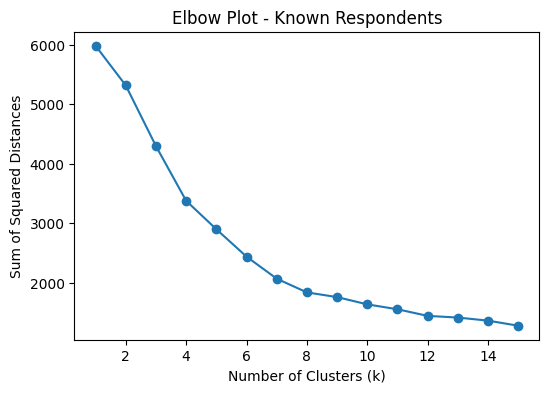

In [ ]:
SEED = 4999
elbow_scores_known = []

# loop k = 1 to 15
for k in range(1, 16):
    kmeans_known = KMeans(n_clusters=k, random_state=SEED)
    kmeans_known.fit(scaled_data_known)
    elbow_scores_known.append(kmeans_known.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 16), elbow_scores_known, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Plot - Known Respondents")
plt.show()

k=3

In [ ]:
#make copy to avoid errors/warning message
resp_known_df = resp_known.copy()
# create an untrained KMeans model with k=3 and random_state=SEED
k_means = KMeans(
    n_clusters=3,
    init='random',
    n_init=10,
    max_iter=100,
    random_state=SEED
)

# fit the model on the KNOWN SCALED DATA
trained_model = k_means.fit(scaled_data_known)

# predict cluster labels
known_clusters = trained_model.predict(scaled_data_known)

# add to your known dataframe
resp_known_df['cluster'] = known_clusters

In [ ]:
resp_known_df['cluster'].value_counts()

,count
cluster,
2,444
0,151
1,70


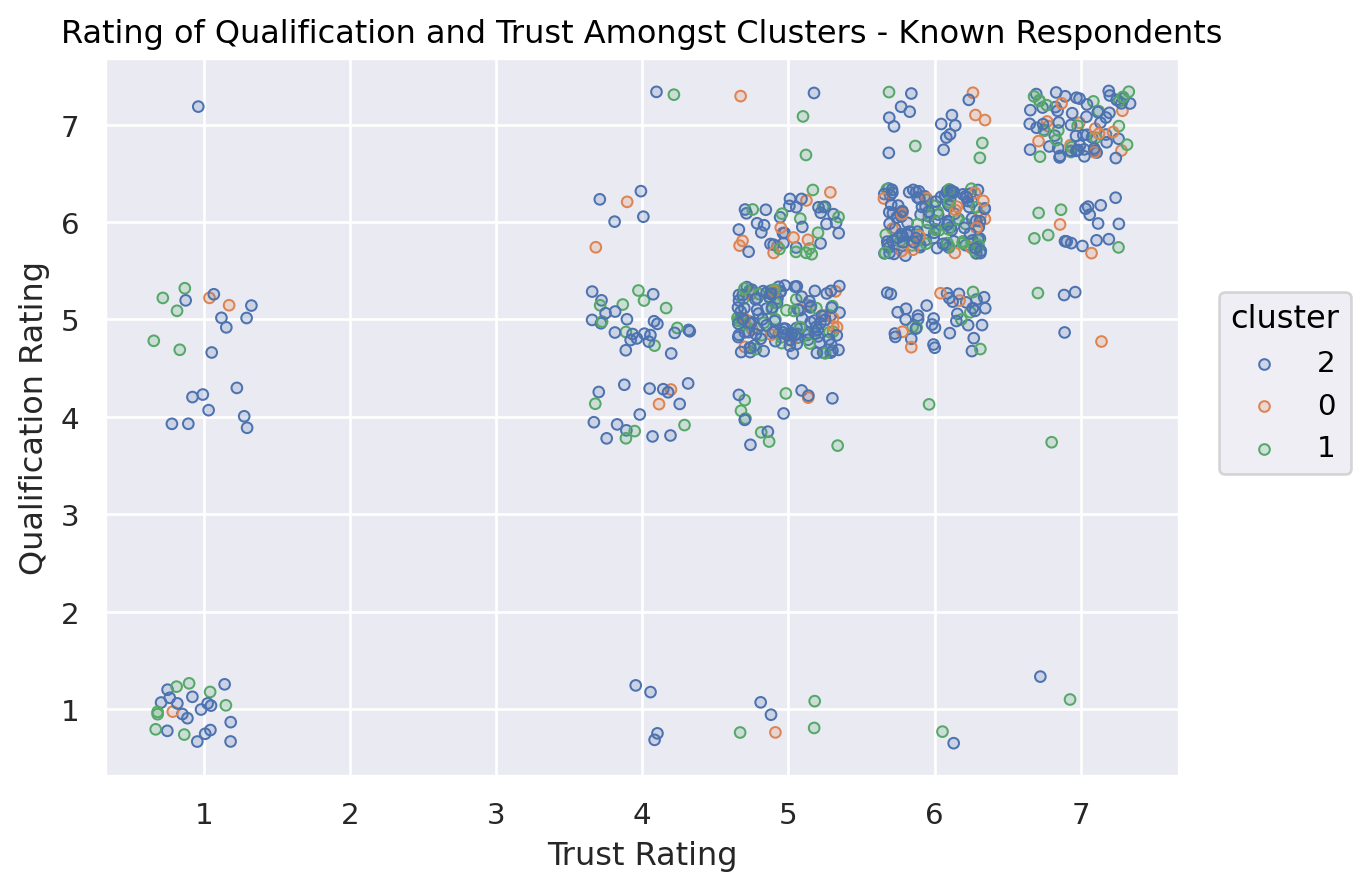

In [ ]:
cluster_colors = {0: "1", 1: "0", 2: "2"}
known_jitter = (
    so.Plot(
        resp_known_df["rating_trust"],
        resp_known_df["rating_qualified"],
        color=resp_known_df["cluster"].map(cluster_colors),  # cluster color
    )
    .add(so.Dots(), so.Jitter(x=0.7, y=0.7))
    .label(
        x="Trust Rating",
        y="Qualification Rating",
        title="Rating of Qualification and Trust Amongst Clusters - Known Respondents"
    )
)
known_jitter

There is a lot more trust and ratign qualification for the `'known'` respondants/people choosing to answer (assuming tha `'1'` is choosing not to answer)

# **FOR UNKNOWN**

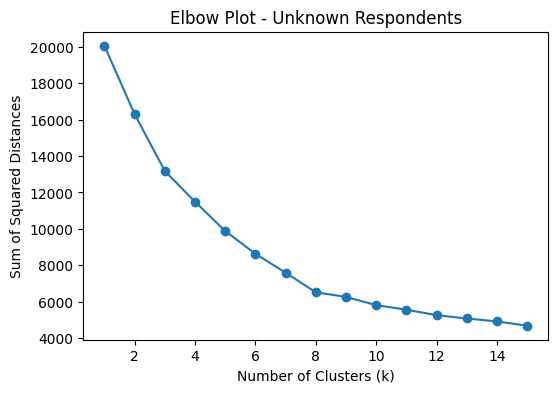

In [ ]:
SEED = 4999
elbow_scores_unknown = []

# loop k = 1 to 15
for k in range(1, 16):
    kmeans_unknown = KMeans(n_clusters=k, random_state=SEED)
    kmeans_unknown.fit(scaled_data_unknown)
    elbow_scores_unknown.append(kmeans_unknown.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 16), elbow_scores_unknown, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Plot - Unknown Respondents")
plt.show()

k=3

In [ ]:
#make copy to avoid errors/warning message
resp_unknown_df = resp_unknown.copy()
# create an untrained KMeans model with k=3 and random_state=SEED
k_means = KMeans(
    n_clusters=3,
    init='random',
    n_init=10,
    max_iter=100,
    random_state=SEED
)

# fit the model on the UNKNWON SCALED DATA
trained_model = k_means.fit(scaled_data_unknown)

# predict cluster labels
unknown_clusters = trained_model.predict(scaled_data_unknown)

# add to your unknown dataframe
resp_unknown_df['cluster'] = unknown_clusters

In [ ]:
resp_unknown_df['cluster'].value_counts()

,count
cluster,
2,844
0,694
1,690


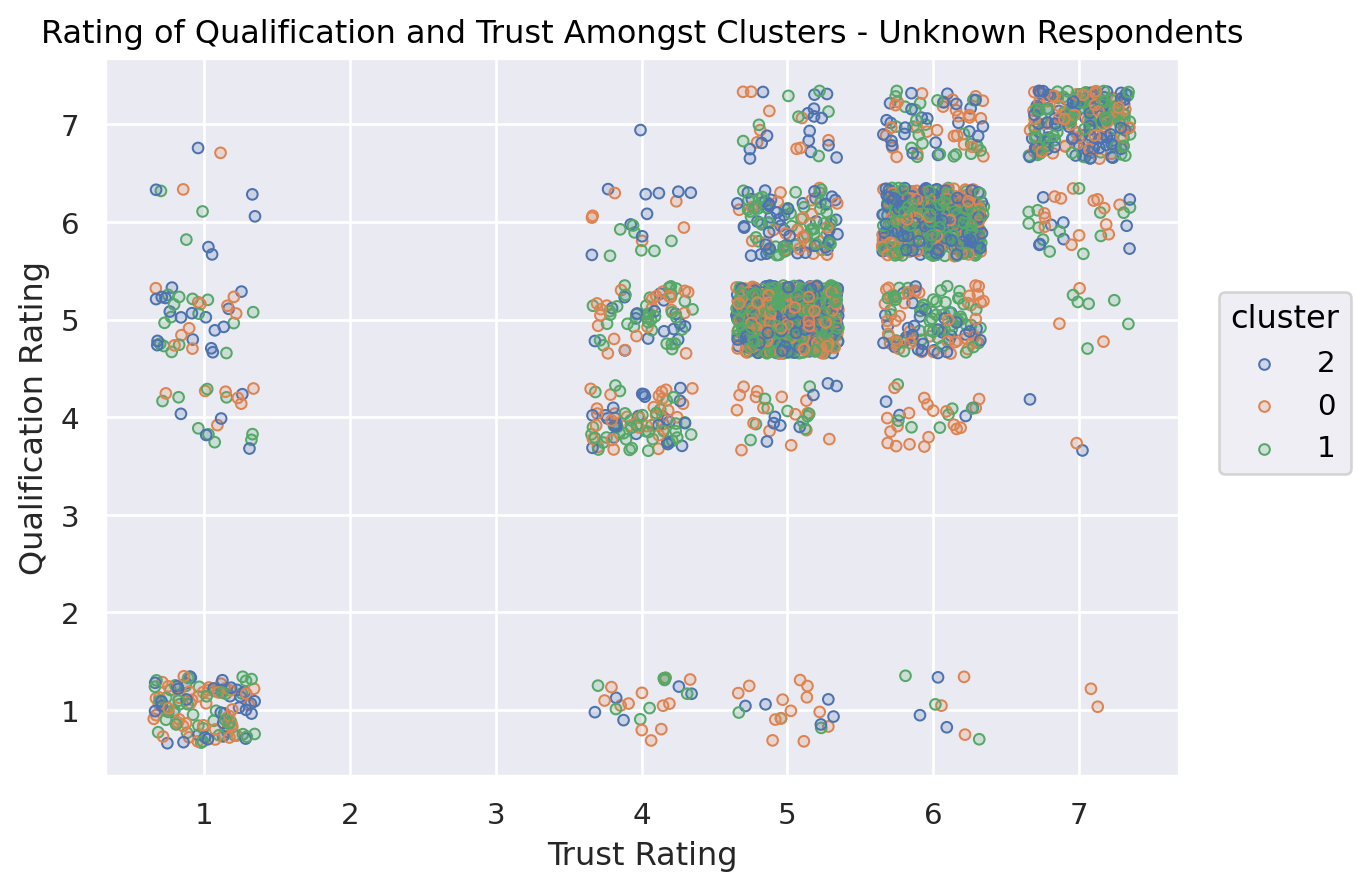

In [ ]:
cluster_colors = {0: "0", 1: "2", 2: "1"}
unknown_jitter = (
    so.Plot(
        resp_unknown_df["rating_trust"],
        resp_unknown_df["rating_qualified"],
        color=resp_unknown_df["cluster"].map(cluster_colors),  # cluster color
    )
    .add(so.Dots(), so.Jitter(x=0.7, y=0.7))
    .label(
        x="Trust Rating",
        y="Qualification Rating",
        title="Rating of Qualification and Trust Amongst Clusters - Unknown Respondents"
    )
)
unknown_jitter

# **Heat Maps**

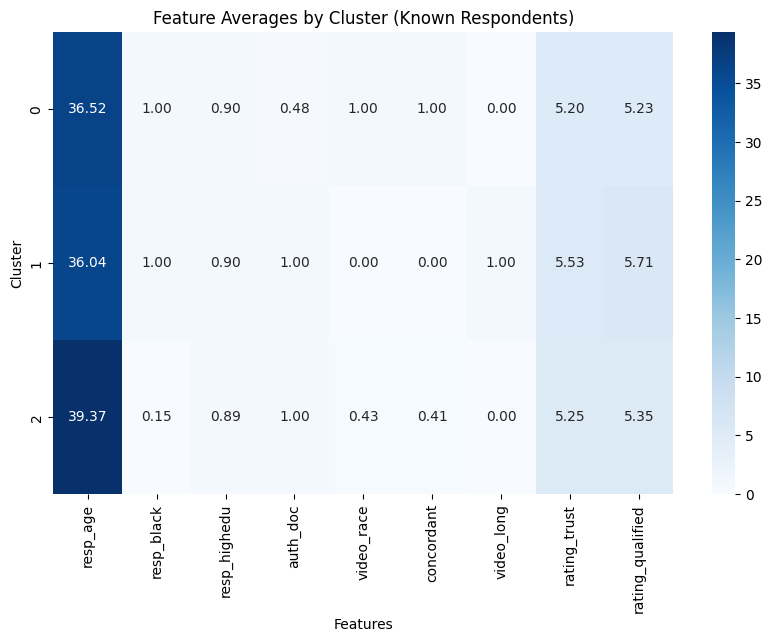

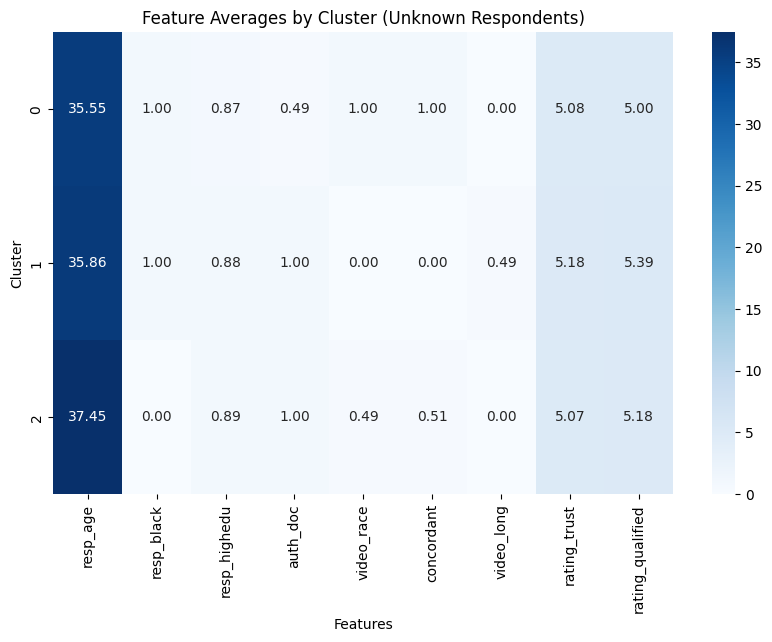

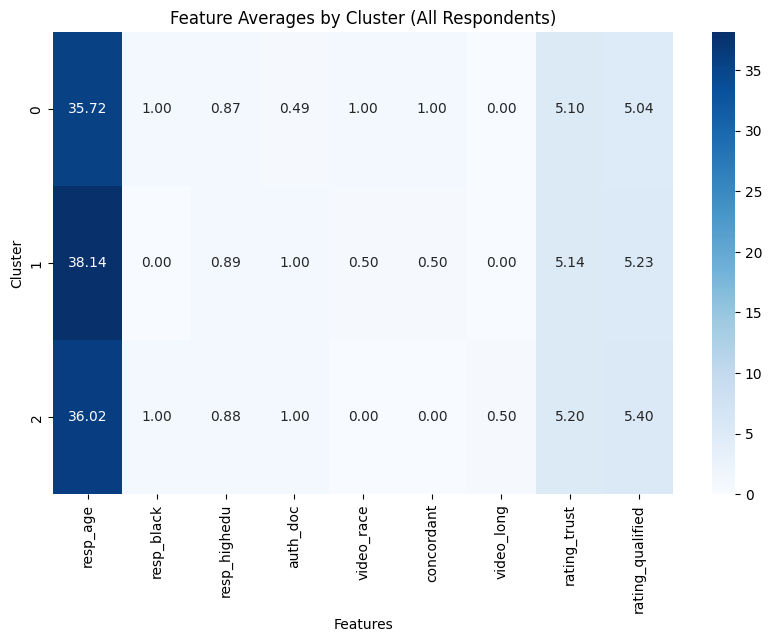

In [ ]:
import seaborn as sns

# dictionary to loop through
data_groups = {
    "Known Respondents": resp_known_df,
    "Unknown Respondents": resp_unknown_df,
    "All Respondents": survey_df
}

# for loop
for group_name, df in data_groups.items():
    # group by cluster and calculate mean of features
    cluster_means = df.groupby('cluster')[features_for_clustering].mean()

    plt.figure(figsize=(10, 6))
    sns.heatmap(cluster_means, annot=True, cmap='Blues', fmt='.2f')#round to 2 dec
    plt.title(f'Feature Averages by Cluster ({group_name})')
    plt.xlabel('Features')
    plt.ylabel('Cluster')
    plt.show()

Just going to view in table now ex.`'unknown'`

In [ ]:
# Grouping by cluster
cluster_group  = resp_unknown_df.groupby('cluster')[['resp_age', 'resp_black', 'resp_highedu','auth_doc','video_race', 'concordant', 'video_long','rating_trust','rating_qualified']]

# we'll keep the size of each cluster
size = cluster_group.size()

# and we'll set the columns to their means in each cluster
cluster_group = cluster_group.mean()

# add size as a column
cluster_group['size'] = size

display(cluster_group)

,resp_age,resp_black,resp_highedu,auth_doc,video_race,concordant,video_long,rating_trust,rating_qualified,size
cluster,,,,,,,,,,
0,35.547550,1.0,0.868876,0.494236,1.000000,1.000000,0.000000,5.083573,4.997118,694
1,35.859420,1.0,0.879710,1.000000,0.000000,0.000000,0.492754,5.179710,5.385507,690
2,37.447867,0.0,0.888626,1.000000,0.490521,0.509479,0.000000,5.069905,5.175355,844


### **I'm gonna confirm that it's really group with no other race but either white or black (that was really interesting to me for the clusters)**

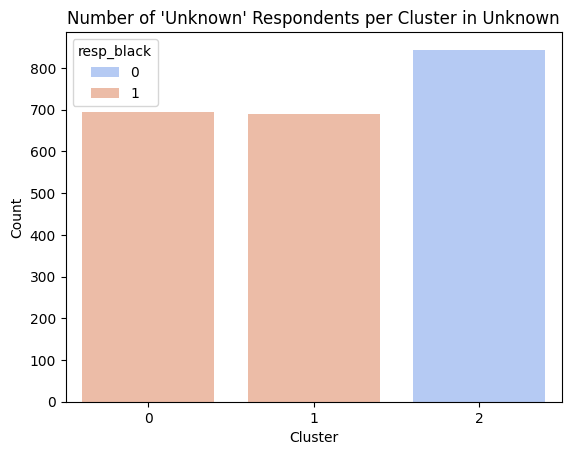

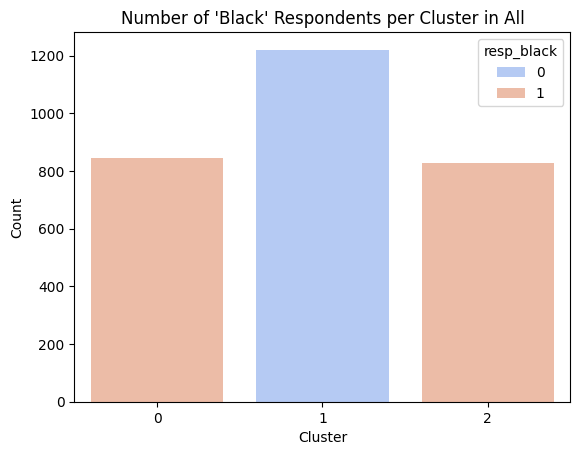

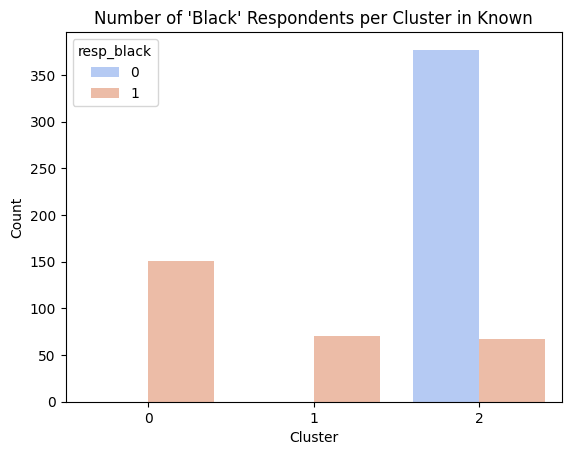

In [ ]:
#race division amognst clusters
sns.countplot(data=resp_unknown_df, x='cluster',hue='resp_black', palette='coolwarm')
plt.title("Number of 'Unknown' Respondents per Cluster in Unknown")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

sns.countplot(data=survey_df, x='cluster',hue='resp_black', palette='coolwarm')
plt.title("Number of 'Black' Respondents per Cluster in All")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

sns.countplot(data=resp_known_df, x='cluster',hue='resp_black', palette='coolwarm')
plt.title("Number of 'Black' Respondents per Cluster in Known")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

Very interesting!

# **Patterns Across Clusters**

---

Now I want see patterns across clusters, such as which clusters contain more respondents who did or did not get a flu shot, and how the unknown group is distributed across clusters. I will also apply race!

In [ ]:
_=pd.crosstab(survey_df['cluster'], survey_df['el_flushot'])
display(_)
pd.crosstab(survey_df['cluster'], survey_df['resp_black'])

el_flushot,0,1,Unknown
cluster,,,
0,46,105,694
1,86,291,844
2,34,103,690


resp_black,0,1
cluster,,
0,0,845
1,1221,0
2,0,827


In [ ]:
_=pd.crosstab(resp_unknown_df['cluster'], resp_unknown_df['el_flushot'])
display(_)
pd.crosstab(resp_unknown_df['cluster'], resp_unknown_df['resp_black'])

el_flushot,Unknown
cluster,
0,694
1,690
2,844


resp_black,0,1
cluster,,
0,0,694
1,0,690
2,844,0


Dont believe this is need but just to see for known respondants

In [ ]:
_=pd.crosstab(resp_known_df['cluster'], resp_known_df['el_flushot'])
display(_)
pd.crosstab(resp_known_df['cluster'], resp_known_df['resp_black'])

el_flushot,0,1
cluster,,
0,46,105
1,14,56
2,106,338


resp_black,0,1
cluster,,
0,0,151
1,0,70
2,377,67


Evaluated in Conclusion

#**Distribuiton of Flu Shots Responses Across All Clusters**

# `"prototypes" `

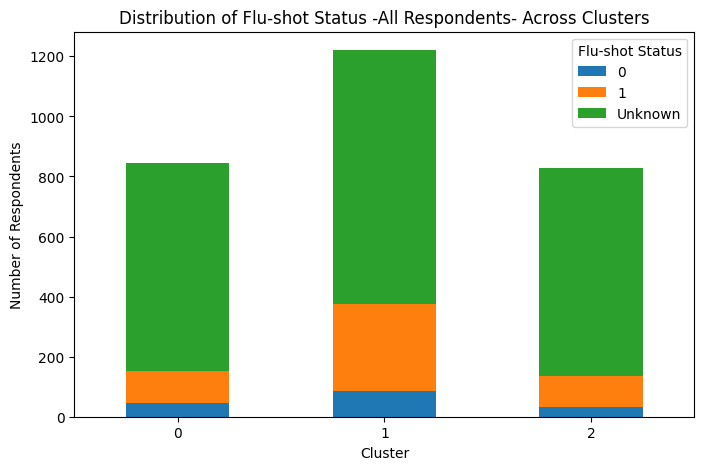

In [ ]:
# Compute counts per cluster and flu-shot status
df_counts = survey_df.groupby(['cluster', 'el_flushot']).size().unstack(fill_value=0)

# Plot stacked bar chart
df_counts.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Distribution of Flu-shot Status -All Respondents- Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of Respondents")
plt.legend(title="Flu-shot Status")
plt.xticks(rotation=0)
plt.show()

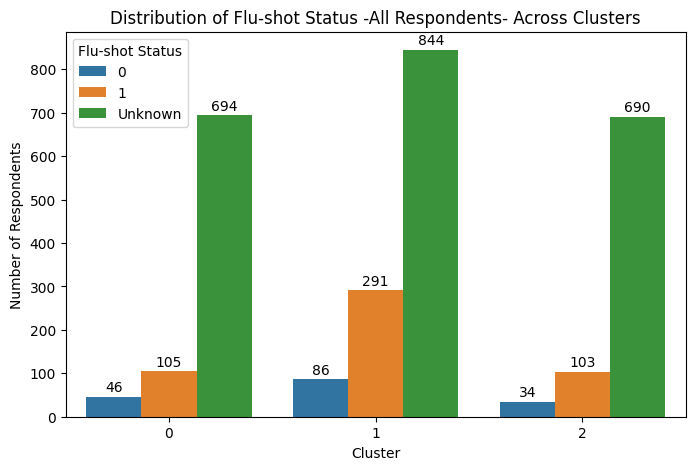

In [ ]:
df_counts = survey_df.groupby(['cluster', 'el_flushot']).size().reset_index(name='count')

all_bar = plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_counts, x='cluster', y='count', hue='el_flushot')
plt.title("Distribution of Flu-shot Status -All Respondents- Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of Respondents")
plt.legend(title="Flu-shot Status")

#wanted to incorpate numbers so data scientist can see number across groups
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # only add label if count > 0 #it was showing 0 randomly
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height + 5,
            s=int(height),
            ha='center', va='bottom'
        )

plt.show()

I'll be using the second bar chart because it it better for someone to understand it alongside the bar chart I used below, if I want to compare how group 0 aligns, it more visually digestable if dont stack the barcharts

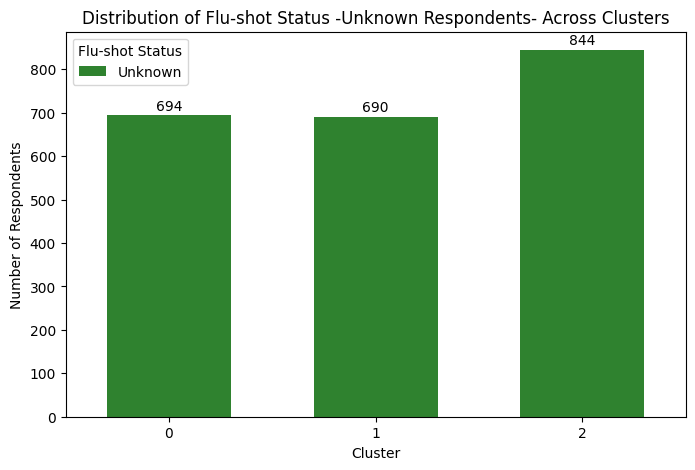

In [ ]:
df_counts = resp_unknown_df.groupby(['cluster', 'el_flushot']).size().reset_index(name='count')

unknown_bar = plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_counts, x='cluster', y='count', hue='el_flushot', palette=['green'],alpha=.87, width=0.6)
plt.title("Distribution of Flu-shot Status -Unknown Respondents- Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of Respondents")
plt.legend(title="Flu-shot Status")

#wanted to incorpate numbers so data scientist can see number across groups
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # only add label if count > 0 #it was showing 0 randomly
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height + 5,
            s=int(height),
            ha='center', va='bottom'
        )

plt.show()

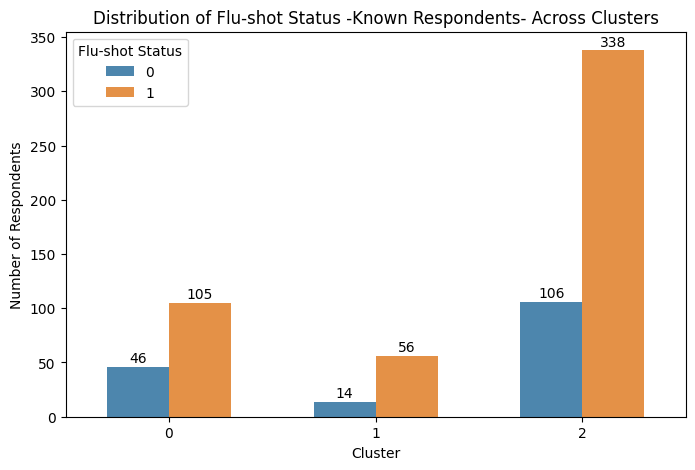

In [ ]:
df_counts = resp_known_df.groupby(['cluster', 'el_flushot']).size().reset_index(name='count')

unknown_bar = plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_counts, x='cluster', y='count', hue='el_flushot',alpha=.87, width=0.6)
plt.title("Distribution of Flu-shot Status -Known Respondents- Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of Respondents")
plt.legend(title="Flu-shot Status")

#wanted to incorpate numbers so data scientist can see number across groups
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # only add label if count > 0 #it was showing 0 randomly
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height + 1,
            s=int(height),
            ha='center', va='bottom'
        )

plt.show()

# **Conclusion**




After running kmeans clustering separately for `'all'` respondents, `'known'` respondents, and `'unknown'` respondents (without using el_flushot as a feature). I then checked how the clusters align with `'el_flushot'`. Cluster 0 was consistent across groups, suggesting its characteristics are stable. Clusters 1 and 2 appeared *flipped* between `'known'` and `'unknown'` groups, showing that `'unknown'` respondents share traits with multiple `'known'` clusters. This indicates variability among unknown respondents and confirms that clustering can reveal systematic differences in respondent characteristics.

One thing that was reall interesting is the group seem divided by race (`'resp_black'`). Clusters appears to be strongly influenced by race, as certain clusters are dominated by respondents of a particular racial group. Now I can further evaluate trust in qualfiication and rating of video (jitter plots).

### **Graphs I'll be using**

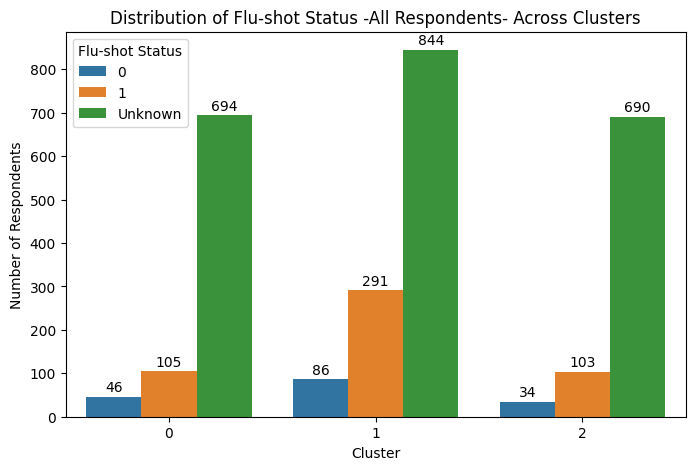

In [ ]:
all_bar

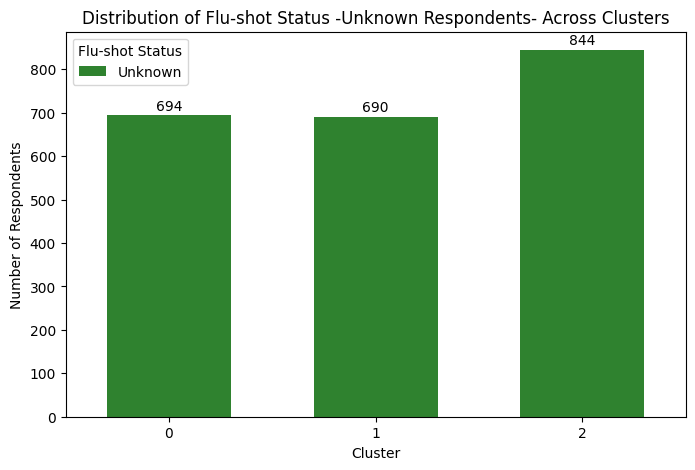

In [ ]:
unknown_bar

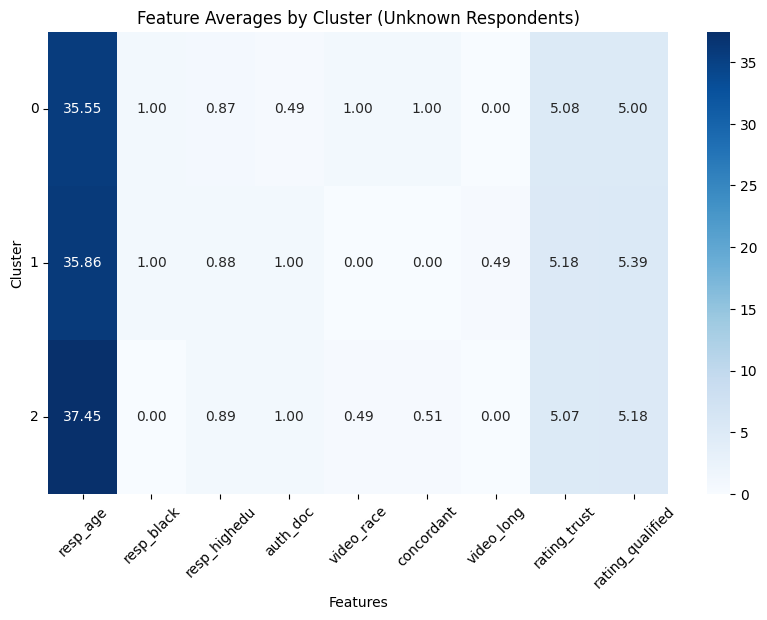

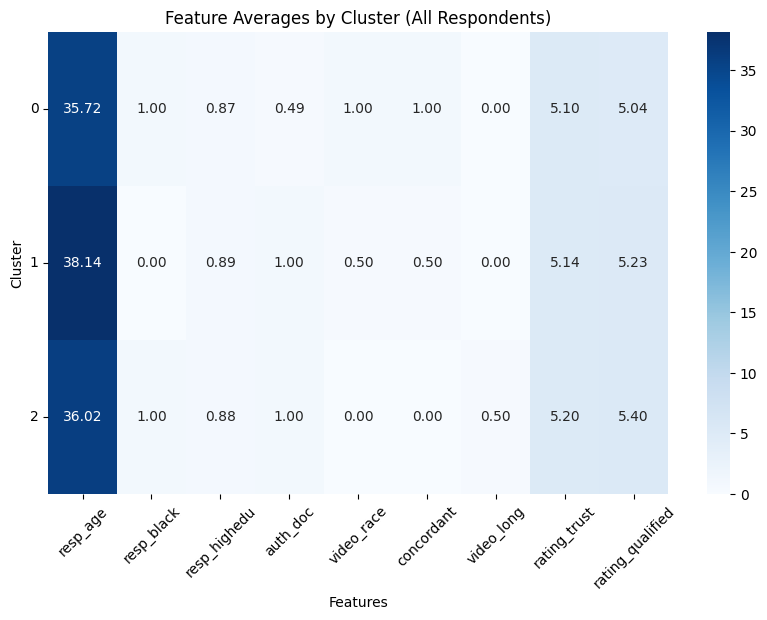

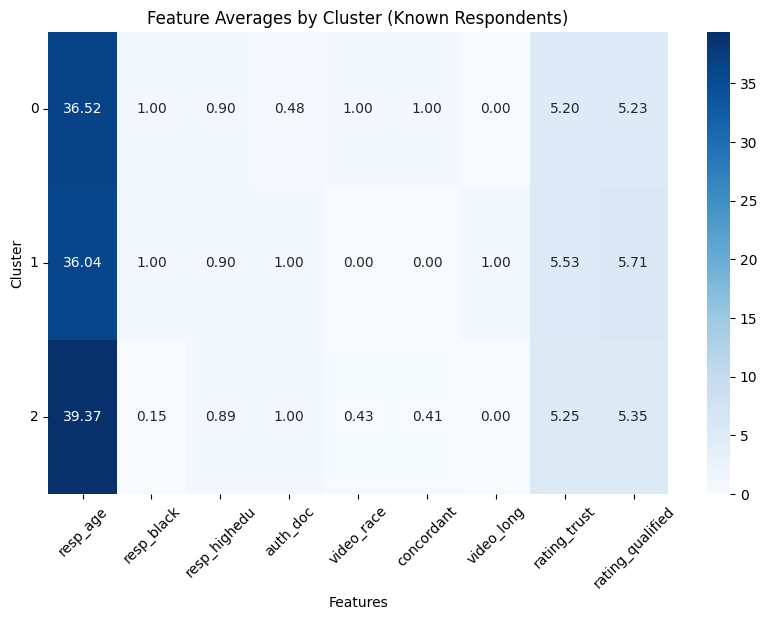

In [ ]:
# data_groups = {
#     "Unknown Respondents": resp_unknown_df,
#     "All Respondents": survey_df

# cluster means heatmap for unknown respondents
cluster_means_unknown = resp_unknown_df.groupby('cluster')[features_for_clustering].mean()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means_unknown, annot=True, cmap='Blues', fmt='.2f')  # round to 2 decimals
plt.title('Feature Averages by Cluster (Unknown Respondents)')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.ylabel('Cluster')
plt.yticks(rotation=360)
plt.show()

# cluster means heatmap for all respondents
cluster_means = survey_df.groupby('cluster')[features_for_clustering].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap='Blues', fmt='.2f')  # round to 2 decimals
plt.title('Feature Averages by Cluster (All Respondents)')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.ylabel('Cluster')
plt.yticks(rotation=360)
plt.show()

# cluster means heatmap for known respondents
cluster_means = resp_known_df.groupby('cluster')[features_for_clustering].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap='Blues', fmt='.2f')  # round to 2 decimals
plt.title('Feature Averages by Cluster (Known Respondents)')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.ylabel('Cluster')
plt.yticks(rotation=360)
plt.show()

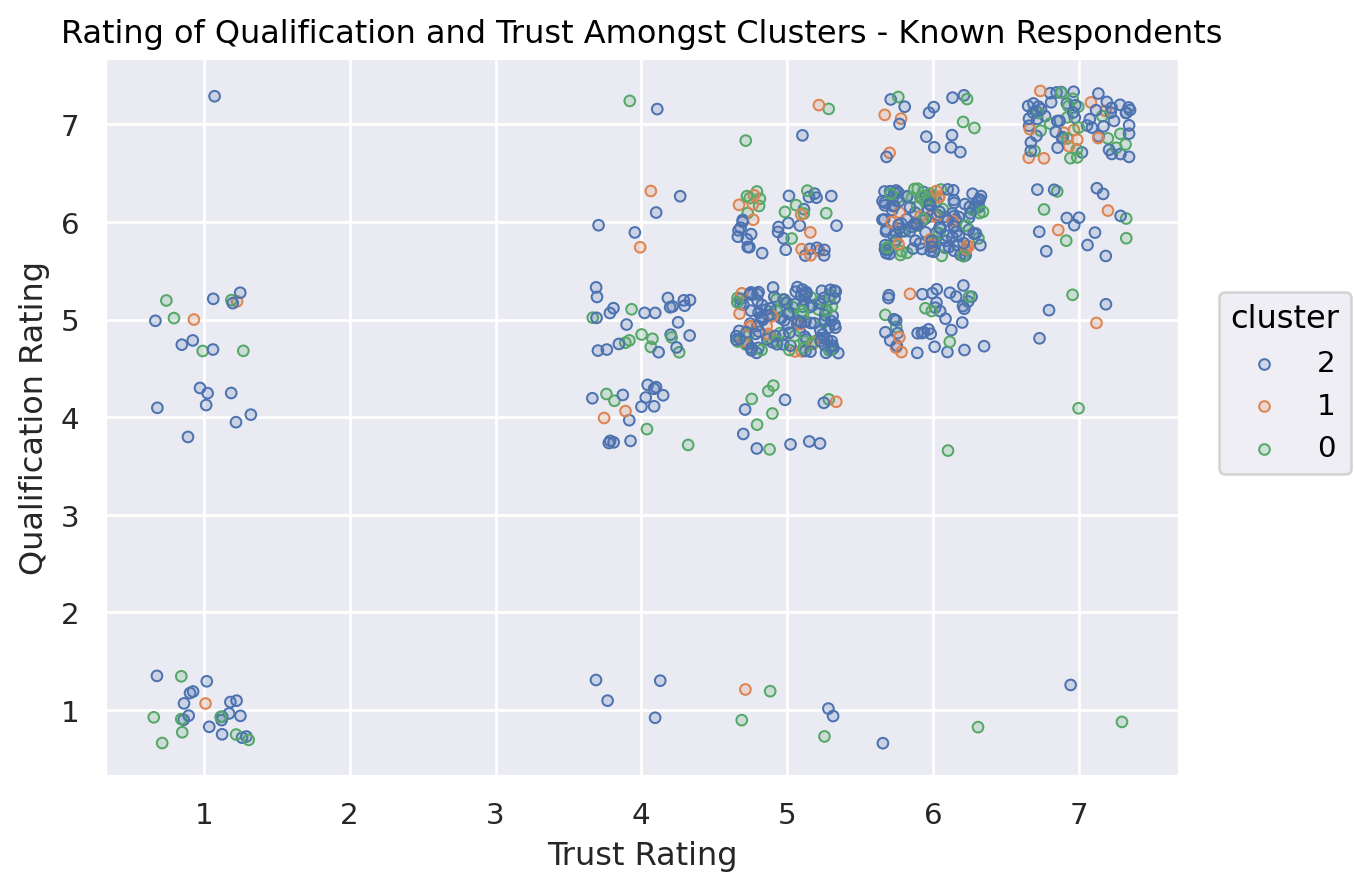

In [ ]:
known_jitter

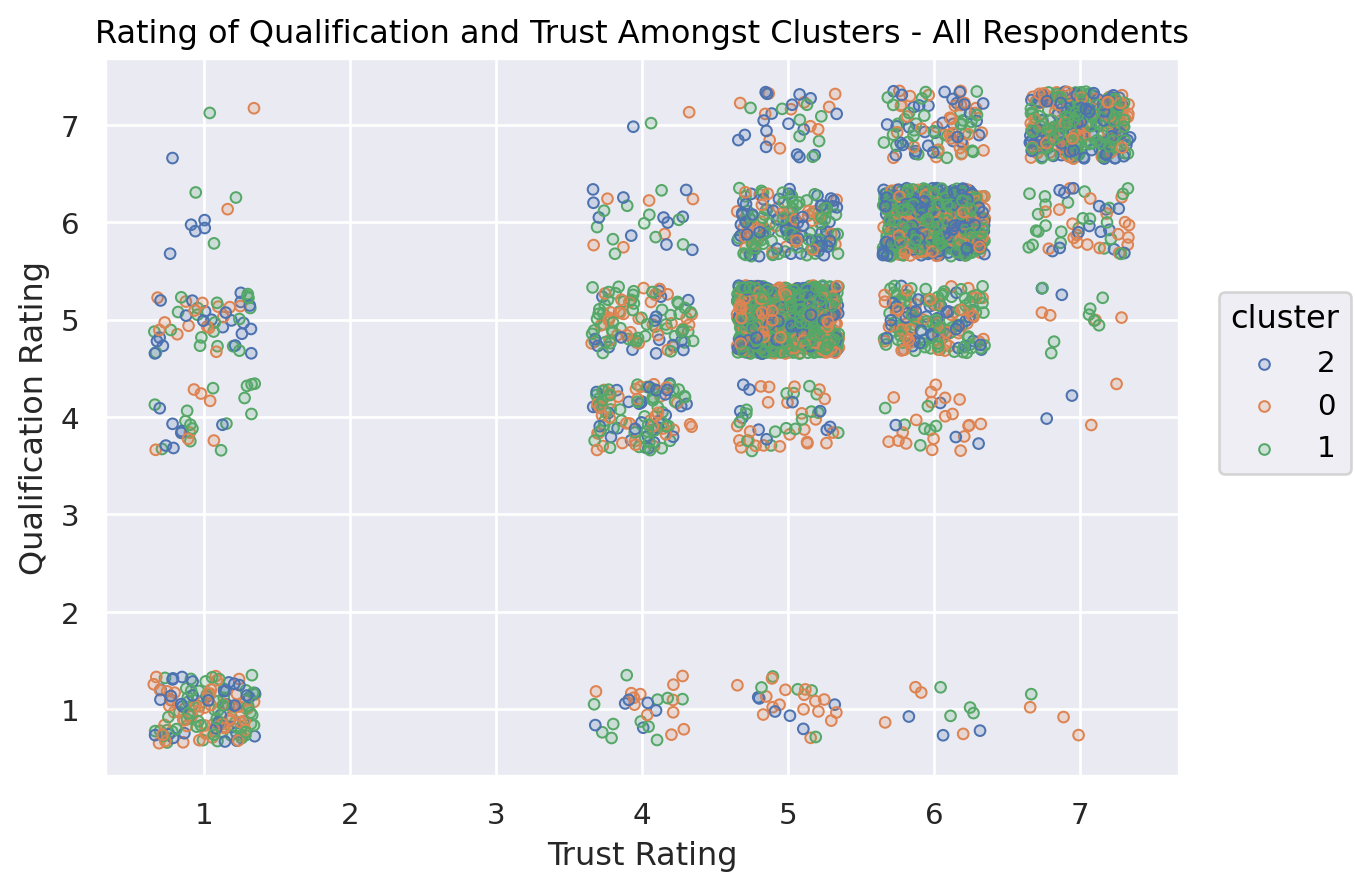

In [ ]:
all_jitter

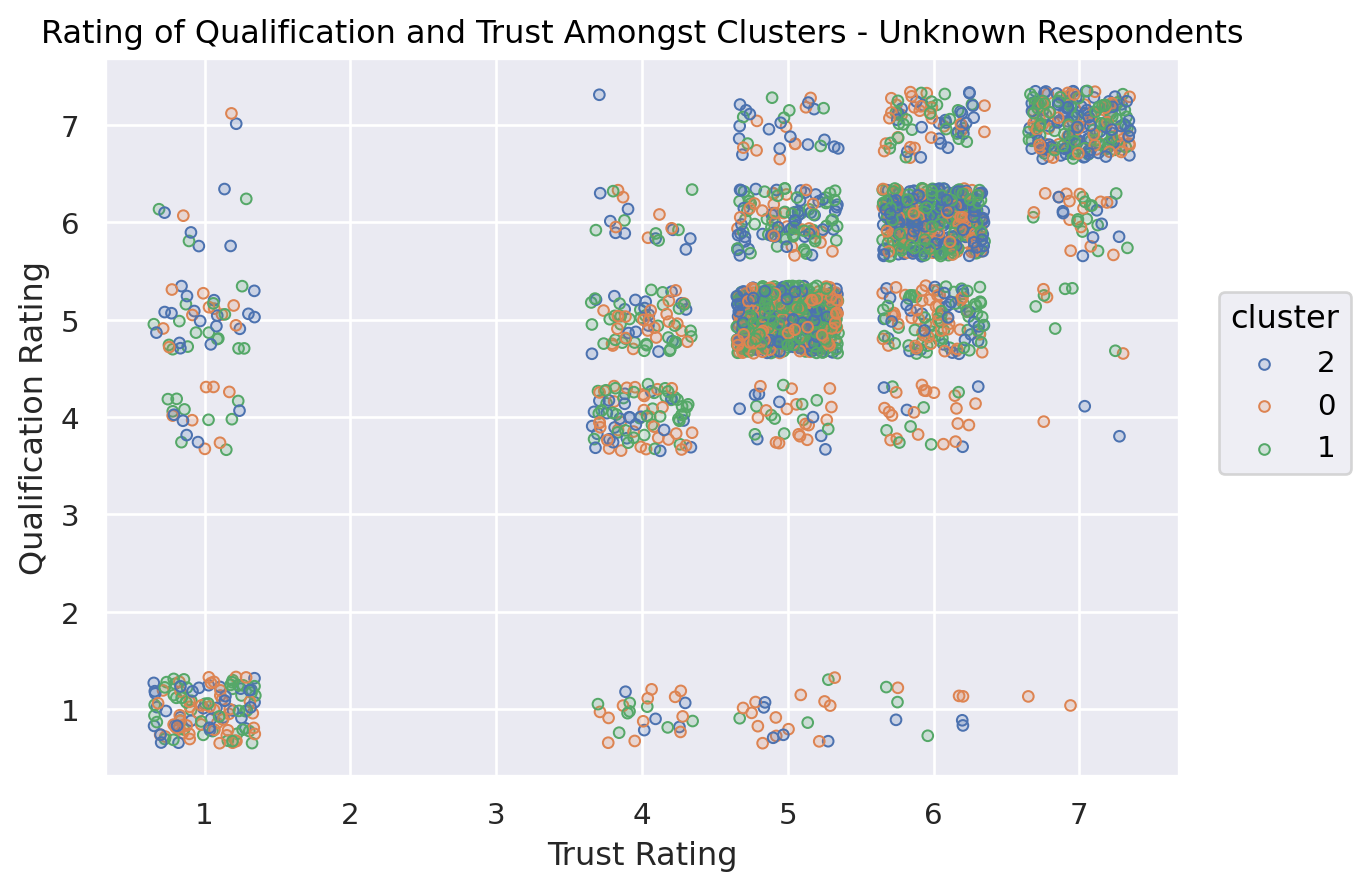

In [ ]:
unknown_jitter